In [ ]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [ ]:
# setup security 
access_token = '2939442994-3O2xly5WhJZ9cfyzcmftAI92x24Co04XqenYD9A'
access_token_secret = 'CyE6DTtgcFfGvGIFkPXfFzK2t1toHHtn4CDYM73ZQhsgs'
consumer_key = 'W4oFwyLEgE6Hi7FsKGQtVaUqp'
consumer_secret = 'sSzH8Wr3DHVTCTAOyerDRCvIcPrzcMtMuwWP14leFZAsbzCWRQ'

# setup file store
file = '/Users/usuario/Documents/Pós/RIWRS/tweets-sample.json'

In [ ]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()      

In [ ]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 180 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['internet da Algar','Algar Telecom','ALGAR TELECOM','@AlgarTelecom','CTBC'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [29]:
from openpyxl import load_workbook
from textblob import TextBlob as tb
from googletrans import Translator

translator = Translator()

wb = load_workbook(filename = '/Users/usuario/Documents/Pós/RIWRS/RapidMiner Algar Telecom.xlsx')
planilha = wb['RapidMiner Data']
cont = 2
positivo = 0
negativo = 0
neutro = 0
positivo_per = 0.0
negativo_per = 0.0

while cont <= len(planilha['H']):
    analysis_pt =planilha['H'+str(cont)].value
    analysis_en = translator.translate(analysis_pt,src="pt",dest="en")
    analysis = tb(analysis_en.text)
    polarity = analysis.sentiment.polarity
    cont = cont + 1
    if polarity == 0.0 :
        neutro = neutro + 1
    elif polarity > 0.0 :
        positivo = positivo + 1
        positivo_per = positivo_per + polarity
    else :
        negativo = negativo + 1
        negativo_per = negativo_per + polarity
        
print("Positivo: "+str(positivo))
print("Neutro: "+str(neutro))
print("Negativo: "+str(negativo))
print("Média: "+str((positivo_per+negativo_per)/len(sheet_ranges['H'])))

Positivo: 67
Neutro: 124
Negativo: 70
Média: -0.024059488870438274


In [2]:
#polarity excel
cont2 = 2
positivo2 = 0
negativo2 = 0
neutro2 = 0
datas = []
while cont2 <= len(sheet_ranges['A']):
    polarity = sheet_ranges['M'+str(cont2)].value
    datas.append(sheet_ranges['A'+str(cont2)].value)
    cont2 = cont2 + 1
    if polarity == 'neutral' :
        neutro2 = neutro2 + 1
    elif polarity == 'positive' :
        positivo2 = positivo2 + 1
    else :
        negativo2 = negativo2 + 1
        
print("Positivo: "+str(positivo2))
print("Neutro: "+str(neutro2))
print("Negativo: "+str(negativo2))

Positivo: 40
Neutro: 59
Negativo: 162


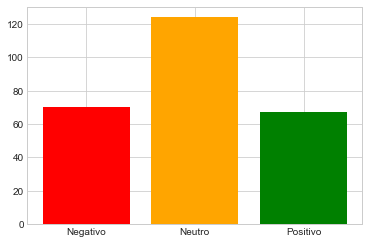

In [30]:
import matplotlib.pyplot as plt

polarity = [negativo,neutro,positivo]
bars = ('Negativo', 'Neutro', 'Positivo')
y_pos = np.arange(len(bars))

plt.bar(y_pos, polarity, color=['red', 'orange', 'green'])
plt.xticks(y_pos, bars)
plt.show()


In [31]:
import matplotlib.pyplot as plt

polarity = [negativo2,neutro2,positivo2]
bars = ('Negativo', 'Neutro', 'Positivo')
y_pos = np.arange(len(bars))

plt.bar(y_pos, polarity, color=['red', 'orange', 'green'])
plt.xticks(y_pos, bars)
plt.show()

In [21]:
datas.sort()
print(str(datas[1]))
dias = []
quantidades = []
for data in datas :
    dia = f"{data:%Y-%m-%d}"
    if dia in dias :
        posicao = dias.index(dia)
        quantidades[posicao] = quantidades[posicao] + 1
    else :
        dias.append(f"{data:%Y-%m-%d}")
        quantidades.append(1)

print(dias)
print(quantidades)
    

2018-06-25 08:38:32
['2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04']
[31, 48, 14, 26, 24, 14, 21, 42, 14, 27]


In [16]:
# libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
 
# Color palette
blue, = sns.color_palette("muted", 1)
 
# Create data
x = dias
y = quantidades
 
# Make the plot
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x, y, color=blue, lw=3)
ax.fill_between(x, 0, y, alpha=.3)
ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x)


[(0, 50.4),
 (0, 9)]